<a href="https://colab.research.google.com/github/averyshepherd/crypto-climate-sentiment/blob/main/sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.2 MB/s 


In [ ]:
import pandas as pd
import nltk
import numpy as np
import vaderSentiment

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving token_replacements.csv to token_replacements.csv
Saving Tweets_Bitcoin_Climate.csv to Tweets_Bitcoin_Climate.csv
Saving Tweets_Ethereum_Climate.csv to Tweets_Ethereum_Climate.csv


In [ ]:
bitcoin = pd.read_csv('Tweets_Bitcoin_Climate.csv')
ether = pd.read_csv('Tweets_Ethereum_Climate.csv')
replacements = pd.read_csv('token_replacements.csv')

In [ ]:
# replace similar words

replace = dict(zip(replacements['token'], replacements['replacement']))

def replace_similar(sent):
  l = []
  for t in tokens:
    if t in replace:
      t = replace[t]
    l.append(t)
  return l

bitcoin

,Unnamed: 0,Date,Tweet
0,0,2021-03-01 23:06:22+00:00,Bill Gates discusses the importance of address...
1,1,2021-03-01 22:39:32+00:00,What the fuck is wrong with people who think c...
2,2,2021-03-01 22:24:20+00:00,Bitcoin's 'Staggering' Energy Consumption Rais...
3,3,2021-03-01 22:13:10+00:00,"Ultimately these things, like bitcoin, cost us..."
4,4,2021-03-01 21:42:26+00:00,In Your Inbox: Circular economy overview; low ...
...,...,...,...
9613,9613,2021-05-30 05:28:52+00:00,"The Defi scam, Paris climate accord goals, and..."
9614,9614,2021-05-30 04:44:28+00:00,Needs to be asked: \nWhat immense energy sourc...
9615,9615,2021-05-30 02:44:18+00:00,@elonmusk @blockfolio He will be the penultima...
9616,9616,2021-05-30 02:14:10+00:00,Bitcoin is notoriously climate-hostile. What J...


In [ ]:
# TweetTokenizer keeps hashtags and handles intact while word_tokenize does not
# tknzr = nltk.word_tokenize(preserve_case=False)
nltk.download('punkt')
bitcoin['tokens'] = bitcoin['Tweet'].apply(nltk.word_tokenize)
ether['tokens'] = ether['Tweet'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(tokens):
  for s in stop_words:
    while s in tokens:
      tokens.remove(s)
  return tokens 

bitcoin['tokens'] = bitcoin['tokens'].apply(remove_stopwords)
ether['tokens'] = ether['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# remove lonely punctuation
import string
punc = string.punctuation
punc += '’‘”“–....¯—...'

print(punc)

def remove_punc(tokens):
  for p in punc:
    while p in tokens:
      tokens.remove(p)
  return tokens 

bitcoin['tokens'] = bitcoin['tokens'].apply(remove_punc)
ether['tokens'] = ether['tokens'].apply(remove_punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~’‘”“–....¯—...


In [ ]:
# remove links
def remove_links(tokens):
  for t in tokens:
    if len(t) > 13:
      if t[:13] == 'https://t.co/':
        tokens.remove(t)
  return tokens 

bitcoin['tokens'] = bitcoin['tokens'].apply(remove_links)
ether['tokens'] = ether['tokens'].apply(remove_links)

In [ ]:
# strip hashtags
def strip_hash(tokens):
  lst = []
  for t in tokens:
    t = t.replace('#', '')
    lst.append(t)
  return lst

bitcoin['tokens'] = bitcoin['tokens'].apply(strip_hash)
ether['tokens'] = ether['tokens'].apply(strip_hash)

In [ ]:
# replace similar words
replace = dict(zip(replacements['token'], replacements['replacement']))

def replace_similar(tokens):
  l = []
  for t in tokens:
    if t in replace:
      t = replace[t]
    l.append(t)
  return l

bitcoin['tokens'] = bitcoin['tokens'].apply(replace_similar)
ether['tokens'] = ether['tokens'].apply(replace_similar)

In [ ]:
# get counts of bitcoin
bit_tokens = bitcoin['tokens'].to_list()
bit_tokens = [item for sublist in bit_tokens for item in sublist]

bit_counts = pd.DataFrame({'token': bit_tokens}).value_counts()

#get word counts of ether
ether_tokens = ether['tokens'].to_list()
ether_tokens = [item for sublist in ether_tokens for item in sublist]
ether_counts = pd.DataFrame({'token': ether_tokens}).value_counts()

In [ ]:
pd.set_option('display.max_rows', None)
print(bit_counts.iloc[:500])

token           
Bitcoin             7511
climate             7473
https               6708
bitcoin             3802
change              2949
Climate             2139
's                  2114
mining              1706
I                   1677
energy              1555
cryptocurrency      1447
Tesla               1291
The                 1173
emission            1135
Musk                 952
''                   886
concerns             856
China                840
says                 827
``                   815
...                  801
elon                 776
n't                  748
renewable            654
It                   624
Elon                 608
Crypto               572
amp                  525
like                 520
Change               514
via                  479
could                478
impact               474
people               469
fossil               465
use                  449
Is                   449
BTC                  449
targets              420
accept  

In [ ]:
print(ether_counts.iloc[:500])
pd.set_option('display.max_rows', 50)

token              
climate                471
https                  437
Ethereum               414
cryptocurrency         248
ethereum               170
Bitcoin                167
change                 149
bitcoin                135
emission               127
I                      111
blockchain             105
NFTs                    97
's                      94
Climate                 85
impact                  82
energy                  80
Crypto                  66
The                     59
NFT                     59
BTC                     56
ETH                     50
amp                     48
like                    44
fight                   41
using                   39
renewable               37
world                   37
mining                  36
artists                 36
We                      35
use                     35
...                     35
fix                     34
eth                     33
one                     32
n't                     32
're     

In [ ]:
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

In [ ]:
climate = ['climate change', 'global warming', 'climate','warming', 'emission', 'planet', 'renewable', 'fossil']

In [ ]:
df_lift_ether=pd.DataFrame(columns=['term','coin','lift'])
i=0
for term in climate:
  temp_lift=calculate_lift(str(term), str('ethereum'), ether.tokens)
  df_lift_ether.loc[i]=[ str(term),str('ethereum'),temp_lift]
  i=i+1

In [ ]:
df_lift_ether

,term,coin,lift
0,climate change,ethereum,0.000000
1,global warming,ethereum,0.000000
2,climate,ethereum,1.000842
3,warming,ethereum,3.371257
4,emission,ethereum,0.922660
5,planet,ethereum,1.264222
6,renewable,ethereum,2.004531
7,fossil,ethereum,0.612956


In [ ]:
df_lift_bitcoin=pd.DataFrame(columns=['term','coin','lift'])
i=0
for term in climate:
  temp_lift=calculate_lift(str(term), str('bitcoin'), ether.tokens)
  df_lift_bitcoin.loc[i]=[ str(term),str('bitcoin'),temp_lift]
  i=i+1

In [ ]:
df_lift_bitcoin

,term,coin,lift
0,climate change,bitcoin,0.000000
1,global warming,bitcoin,0.000000
2,climate,bitcoin,0.998310
3,warming,bitcoin,0.000000
4,emission,bitcoin,0.996950
5,planet,bitcoin,0.657710
6,renewable,bitcoin,3.270775
7,fossil,bitcoin,0.956669


In [ ]:
# words for lifts
words = ["stake", "work", "emission", "warming", "consumption", "fossil", "renewable"]
#words = ['mining', 'warming', 'energy', 'concerns', 'emission', 'renewable', 'consensus', 'fossil', 'problem', 'planet', 'environment', 'consumption', 'electricity', 'power', 'work', 'crisis', 'reduce',"stake"]
lift_bitcoin=pd.DataFrame(columns=['c1','c2','lift'])

i=0
for  a in words:
    for b in words:
        temp_lift=calculate_lift(a, b, bitcoin['tokens'])
        lift_bitcoin.loc[i]=a,b,temp_lift
        i=i+1

bit_lift_matrix = lift_bitcoin.pivot(index='c1', columns='c2')
bit_lift_matrix['Total'] = bit_lift_matrix.apply(np.sum, axis = 1)
bit_lift_matrix

lift                      ...                           Total
c2          consumption  emission    fossil  ...   warming       work           
c1                                           ...                                
consumption         NaN  3.050106  1.467680  ...  1.747456   1.380706  11.127800
emission       3.050106       NaN  1.573658  ...  4.098580   0.809596  12.580127
fossil         1.467680  1.573658       NaN  ...  1.183317   1.636191   8.965002
renewable      1.617898  1.174552  3.104156  ...  1.358782   1.449367  12.183236
stake          1.863953  1.873636  0.000000  ...  0.000000  17.811111  25.027182
warming        1.747456  4.098580  1.183317  ...       NaN   0.000000   8.388135
work           1.380706  0.809596  1.636191  ...  0.000000        NaN  23.086972

[7 rows x 8 columns]

In [ ]:
lift_ether=pd.DataFrame(columns=['c1','c2','lift'])
i=0
for  a in words:
    for b in words:
        temp_lift=calculate_lift(a, b, ether['tokens'])
        lift_ether.loc[i]=a,b,temp_lift
        i=i+1

ether_lift_matrix = lift_ether.pivot(index='c1', columns='c2')
ether_lift_matrix['Total'] = ether_lift_matrix.apply(np.sum, axis = 1)
ether_lift_matrix

lift                      ...                          Total
c2          consumption  emission    fossil  ...   warming      work           
c1                                           ...                               
consumption         NaN  1.077512  4.652893  ...  0.000000  3.937063  14.785649
emission       1.077512       NaN  1.077512  ...  5.926316  1.823482  11.410426
fossil         4.652893  1.077512       NaN  ...  0.000000  0.000000   7.113697
renewable      0.000000  0.320341  1.383292  ...  0.000000  0.585239   2.288873
stake          5.118182  1.185263  0.000000  ...  0.000000  8.661538  14.964983
warming        0.000000  5.926316  0.000000  ...       NaN  0.000000   5.926316
work           3.937063  1.823482  0.000000  ...  0.000000       NaN  15.007322

[7 rows x 8 columns]

In [ ]:
important_words = ["stake", "work", "emission", "warming", "consumption", "fossil", "renewable"]

In [ ]:
bitcoin

,Unnamed: 0,Date,Tweet,tokens
0,0,2021-03-01 23:06:22+00:00,Bill Gates discusses the importance of address...,"[Bill, Gates, discusses, importance, addressin..."
1,1,2021-03-01 22:39:32+00:00,What the fuck is wrong with people who think c...,"[What, fuck, wrong, people, think, cryptocurre..."
2,2,2021-03-01 22:24:20+00:00,Bitcoin's 'Staggering' Energy Consumption Rais...,"[Bitcoin, 's, 'Staggering, Energy, Consumption..."
3,3,2021-03-01 22:13:10+00:00,"Ultimately these things, like bitcoin, cost us...","[Ultimately, things, like, bitcoin, cost, us, ..."
4,4,2021-03-01 21:42:26+00:00,In Your Inbox: Circular economy overview; low ...,"[In, Your, Inbox, Circular, economy, overview,..."
...,...,...,...,...
9613,9613,2021-05-30 05:28:52+00:00,"The Defi scam, Paris climate accord goals, and...","[The, Defi, scam, Paris, climate, accord, goal..."
9614,9614,2021-05-30 04:44:28+00:00,Needs to be asked: \nWhat immense energy sourc...,"[Needs, asked, What, immense, energy, sources,..."
9615,9615,2021-05-30 02:44:18+00:00,@elonmusk @blockfolio He will be the penultima...,"[elon, blockfolio, He, penultimate, person, pl..."
9616,9616,2021-05-30 02:14:10+00:00,Bitcoin is notoriously climate-hostile. What J...,"[Bitcoin, notoriously, climate-hostile, What, ..."


In [ ]:
ether

,Unnamed: 0,Date,Tweet,tokens
0,0,2021-03-01 20:59:32+00:00,Message to climate-concerned ETHheads: \n\nIf...,"[Message, climate-concerned, ETHheads, If, Min..."
1,1,2021-03-01 09:47:54+00:00,@JosefHolm @NFTMansa @kalamint_io Even more im...,"[JosefHolm, NFTMansa, kalamint_io, Even, impor..."
2,2,2021-03-01 07:42:55+00:00,Exciting news from Probit Green heartEarth glo...,"[Exciting, news, Probit, Green, heartEarth, gl..."
3,3,2021-03-01 07:20:31+00:00,If you mint #NFTs you need to switch to #Tezos...,"[If, mint, NFTs, need, switch, Tezos, unless, ..."
4,4,2021-03-01 04:18:45+00:00,#green #greenenergy #btc\n\n #ethereum #usdt h...,"[renewable, greenenergy, bitcoin, ethereum, us..."
...,...,...,...,...
558,558,2021-05-30 19:39:51+00:00,@LudidiCB @climate It's open source... there's...,"[LudidiCB, climate, It, 's, open, source, ...,..."
559,559,2021-05-30 17:20:55+00:00,Ethereum is closing in on a long-sought fix to...,"[Ethereum, closing, long-sought, fix, reduce, ..."
560,560,2021-05-30 14:05:01+00:00,@awayiflew You have an existential dread of cl...,"[awayiflew, You, existential, dread, climate, ..."
561,561,2021-05-30 10:58:36+00:00,"The shift could mean Ethereum's 45,000-gigawat...","[The, shift, could, mean, Ethereum, 's, 45,000..."


In [ ]:
ether_sent = []
for i in range(len(important_words)):
  mask = ether[ether['tokens'].apply(lambda s: important_words[i] in s)]
  ether_sent.append(mask['Tweet'].to_list())

len(ether_sent)

6

In [ ]:
bitcoin_sent = []
for i in range(len(important_words)):
  mask = bitcoin[bitcoin['tokens'].apply(lambda s: important_words[i] in s)]
  bitcoin_sent.append(mask['Tweet'].to_list())

len(bitcoin_sent)

6

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentim(sentences):
  sent = {'neg': 0.0, 'neu': 0, 'pos': 0, 'compound': 0}
  for s in sentences:
    sia = SentimentIntensityAnalyzer()
    temp = sia.polarity_scores(s)
    sent['neg'] += temp['neg']
    sent['neu'] += temp['neu']
    sent['pos'] += temp['pos']
    sent['compound'] += temp['compound']
  sent['neg'] /= len(sentences)
  sent['neu'] /= len(sentences)
  sent['pos'] /= len(sentences)
  sent['compound'] /= len(sentences)
  return sent


dict_pd = {}
for i in range(len(bitcoin_sent)):
  tmp = sentim(bitcoin_sent[i])
  dict_pd[important_words[i]] = tmp

bitcoin_sentiments = pd.DataFrame(dict_pd).T

dict_pd = {}
for i in range(len(ether_sent)):
  tmp = sentim(ether_sent[i])
  dict_pd[important_words[i]] = tmp

ether_sentiments = pd.DataFrame(dict_pd).T

In [ ]:
def polarity_score(score):
  if score >= .05:
    return 'Positive'
  elif score <= -.05:
    return 'Negative'
  return "Neutral"

bitcoin_sentiments['Polarity'] = bitcoin_sentiments["compound"].apply(polarity_score)
bitcoin_sentiments

,neg,neu,pos,compound,Polarity
stake,0.056208,0.854417,0.089417,0.190450,Positive
work,0.095317,0.802042,0.102667,0.015146,Neutral
emission,0.068179,0.857635,0.074179,0.026349,Neutral
warming,0.099833,0.758875,0.141292,0.089011,Positive
consumption,0.078023,0.803264,0.118705,0.132998,Positive
fossil,0.086370,0.818997,0.094622,0.013581,Neutral
renewable,0.071834,0.793329,0.134816,0.220725,Positive


In [ ]:
ether_sentiments['Polarity'] = np.where(ether_sentiments["neg"] > ether_sentiments["pos"], 'Negative', 'Positive')
ether_sentiments

,neg,neu,pos,compound,Polarity
stake,0.056650,0.811600,0.131750,0.316445,Positive
work,0.059562,0.811187,0.129281,0.254022,Positive
emission,0.026905,0.888484,0.084653,0.246311,Positive
warming,0.095000,0.762000,0.143000,0.090000,Positive
consumption,0.064364,0.791182,0.144545,0.271391,Positive
fossil,0.050909,0.872091,0.076818,0.105773,Positive
renewable,0.033000,0.870405,0.096649,0.199432,Positive


In [ ]:

bit_lift_matrix.fillna(1, inplace = True)
bit_lift_matrix = bit_lift_matrix.round(4)
#bit_lift_matrix = bit_lift_matrix.drop( columns = ['Total'])

model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
mds_out = model.fit_transform(bit_lift_matrix)


x = mds_out[:,0]
y = mds_out[:,1]
z = mds_out[:,2]

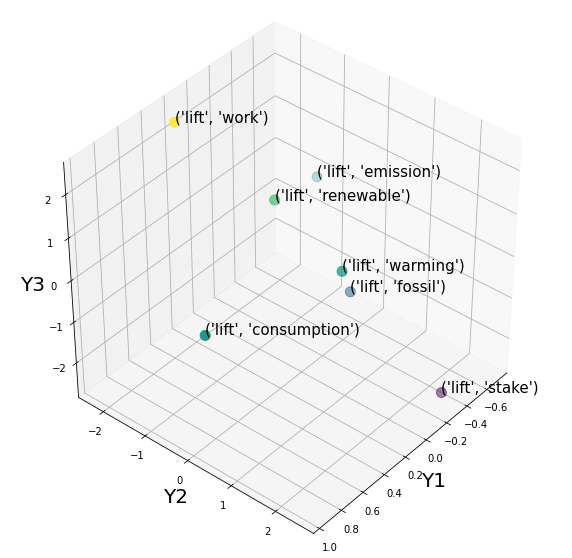

In [ ]:
import sys
import matplotlib as mpl
import seaborn as sns
import sklearn

#from sklearn.metrics import pairwise_distances
#from sklearn.manifold import MDS
#from sklearn import preprocessing
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
    
%matplotlib inline

# Oblique view
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, s=100, c=z)

ax.view_init(azim=40, elev=40)
ax.set_xlabel('Y1', fontsize=20)
ax.set_ylabel('Y2', fontsize=20)
ax.set_zlabel('Y3', fontsize=20)

for i, txt in enumerate(bit_lift_matrix):
    ax.text(x[i], y[i], z[i], txt, fontsize=15)

plt.show()

In [ ]:
ether_lift_matrix.fillna(1, inplace = True)
ether_lift_matrix = ether_lift_matrix.round(4)
#ether_lift_matrix = ether_lift_matrix.drop(columns = ['Total'])

model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
mds_out = model.fit_transform(ether_lift_matrix)


x = mds_out[:,0]
y = mds_out[:,1]
z = mds_out[:,2]

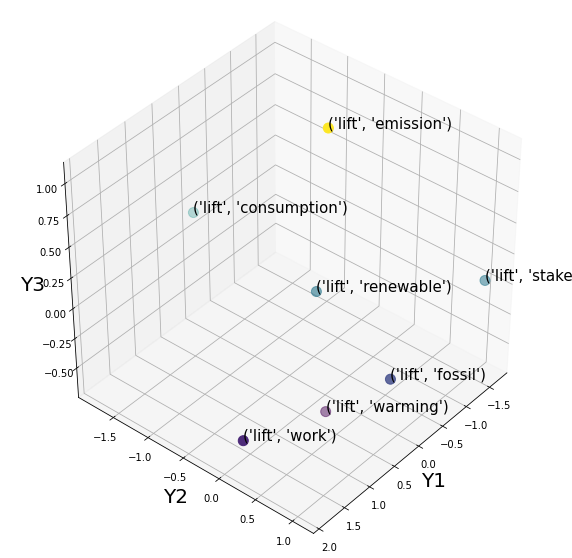

In [ ]:
import sys
import matplotlib as mpl
import seaborn as sns
import sklearn

#from sklearn.metrics import pairwise_distances
#from sklearn.manifold import MDS
#from sklearn import preprocessing
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
    
%matplotlib inline

# Oblique view
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, s=100, c=z)

ax.view_init(azim=40, elev=40)
ax.set_xlabel('Y1', fontsize=20)
ax.set_ylabel('Y2', fontsize=20)
ax.set_zlabel('Y3', fontsize=20)

for i, txt in enumerate(ether_lift_matrix):
    ax.text(x[i], y[i], z[i], txt, fontsize=15)

plt.show()